In [1]:
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "training_linear_models"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# 1. Linear Regression

## 1.1. The Normal Equation

In [2]:
X = 2 * np.random.rand(100,1) # rand(100,1) generates a 100×1 array of random floats
y = 4 + 3 * X + np.random.randn(100,1) # randn(100,1) generates a 100×1 array of random floats, as per the standard normal distribution

Saving figure Randomly generated Linear dataset


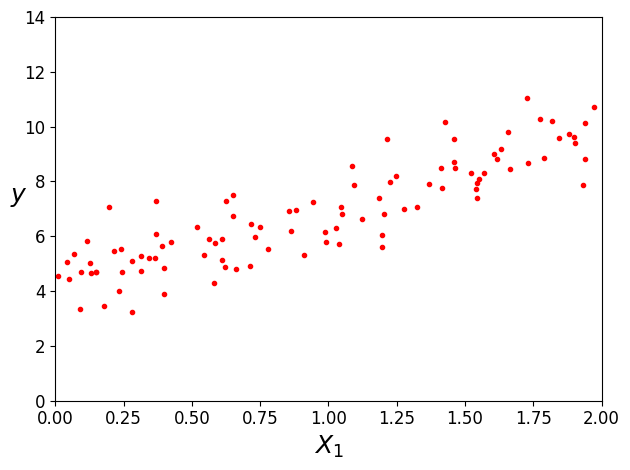

In [3]:
plt.plot(X, y, 'r.')
plt.xlabel("$X_1$", fontsize = 18)
plt.ylabel("$y$", rotation = 0, fontsize = 18)
plt.axis([0, 2, 0, 14])
save_fig("generated_linear_dataset")
plt.show()

We shall compute $\boldsymbol{\hat{\theta}}$ using *the Normal Equation*: $\boldsymbol{\hat{\theta}} = (\boldsymbol{X^{T}X})^{-1}\boldsymbol{X^{T}y}$ (value of $\boldsymbol{\theta}$ which minimizes the cost function: **MSE**($\boldsymbol{X}, h_{\theta}$) = $\frac{1}{m} \sum_{j=1}^{m}(\theta^{T}\boldsymbol{x^{(j)}} - \boldsymbol{y^{(j)}})^2$).

In [4]:
X_b = np.c_[np.ones((100,1)), X] # adds x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
print("theta_best:\n",theta_best)

theta_best:
 [[4.21509616]
 [2.77011339]]


In [5]:
X_new = np.array([[0],[2]])
X_new_b = np.c_[np.ones((2,1)), X_new] # adds x0 = 1 to each instance
y_predict = X_new_b.dot(theta_best)
print("y_predict:\n",y_predict)
print("X_new:\n",X_new)
print("X_new_b:\n",X_new_b)

y_predict:
 [[4.21509616]
 [9.75532293]]
X_new:
 [[0]
 [2]]
X_new_b:
 [[1. 0.]
 [1. 2.]]


Saving figure Linear Regression model predictions


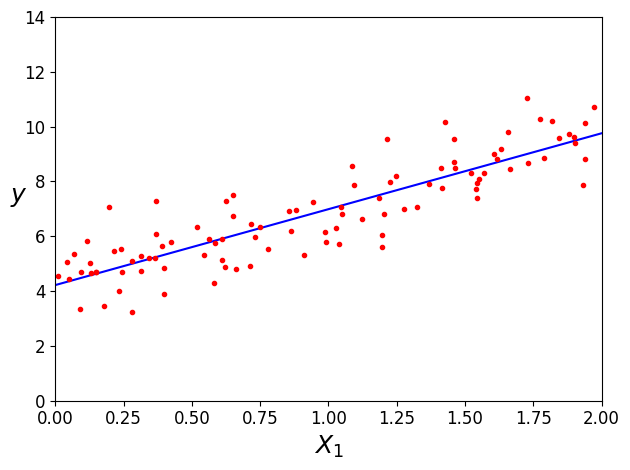

In [6]:
plt.plot(X_new, y_predict, 'b-')
plt.plot(X, y, 'r.')
plt.xlabel("$X_1$", fontsize = 18)
plt.ylabel("$y$", rotation = 0, fontsize = 18)
plt.axis([0, 2, 0, 14])
save_fig("linear_predictions_plot")
plt.show()

We can also perform the same task using `scikit-learn`

In [7]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
print(lin_reg.intercept_, lin_reg.coef_)
lin_reg.predict(X_new)

[4.21509616] [[2.77011339]]


array([[4.21509616],
       [9.75532293]])

The `LinearRegression` is based on the function `scipy.linalg.lstsq()` (least squares)

In [8]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[4.21509616],
       [2.77011339]])

This function computes $\boldsymbol{\hat{\theta}} = \boldsymbol{X^{+}y}$, where, $\boldsymbol{X^{+}}$ is the `pseudo-inverse` (*aka* the **Moore-Penrose inverse**) of $\boldsymbol{X}$. <br>
We can use `np.linalg.pinv()` to compute it directly. <br>
It is computed using the *Singular Value Decomposition (SVD)* method, which involves decomposing $\boldsymbol{X}$ into $\boldsymbol{U.\Sigma.V^{T}}$.

In [9]:
np.linalg.pinv(X_b).dot(y)

array([[4.21509616],
       [2.77011339]])

The pseudo-inverse is computed as, $\boldsymbol{X^{+}} = \boldsymbol{V.\Sigma^{+}.U^{T}}$, where, $\boldsymbol{\Sigma^{+}}$ is obtained by the following algorithm: <br>
(i) Take the SVD of $\boldsymbol{X} = \boldsymbol{U.\Sigma.V^{T}}$, to obtain $\boldsymbol{\Sigma}$. <br>
(ii) Set to zero all values smaller than a tiny `threshold value` $(\epsilon > 0)$. <br>
(iii) Now, replace all non-zero values with their `inverses`. <br>
(iv) Finally, transpose the *resulting* matrix. The resultant is $\boldsymbol{\Sigma^{+}}$.

# 2. Gradient Descent

> **Eqn. for Gradient vector of the cost function** (here, MSE) <br>
<center>$\nabla_{\theta} \text{MSE}(\theta) = \frac{2}{m}\boldsymbol{X}^T(\boldsymbol{X}\theta - \boldsymbol{y})$ </center> <br>

> **Eqn. for Gardient Descent step**<br>
<center>$\theta_{(\text{next step})} = \theta - \eta\nabla_{\theta} \text{MSE}(\theta)$</center>

## 2.1. Batch Gradient Descent

In [10]:
eta = 0.1 #learning step
n_iterations = 1000
m = 100

theta = np.random.randn(2,1) # randn(d0,d1) generates an array of dimension d0 × d1, with elements randomized from the normal distribution.

for _ in range(n_iterations):
    gradient = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta*gradient
    
theta

array([[4.21509616],
       [2.77011339]])

In [11]:
X_new_b.dot(theta)

array([[4.21509616],
       [9.75532293]])

In [23]:
theta_path_bgd = [] # bgd stands for batch gradient descent

def plot_gradient_descent(theta, eta, theta_path = None):
    m = len(X_b)
    plt.plot(X, y, 'b.')
    n_iterations = 1000
    for itr in range(n_iterations):
        if itr < 10:
            y_predict = X_new_b.dot(theta)
            style = 'b-' if itr>0 else 'r--'
            plt.plot(X_new, y_predict, style)
        gradient = 2/m * X_b.T.dot(X_b.dot(theta) - y)
        theta = theta - eta*gradient
        if theta_path is not None:
            theta_path.append(theta)
    plt.xlabel("$x_1$", fontsize = 18)
    plt.axis([0,2,0,15])
    plt.title(r"$\eta = {}$".format(eta), fontsize = 18)

Saving figure gradient_descent_plot


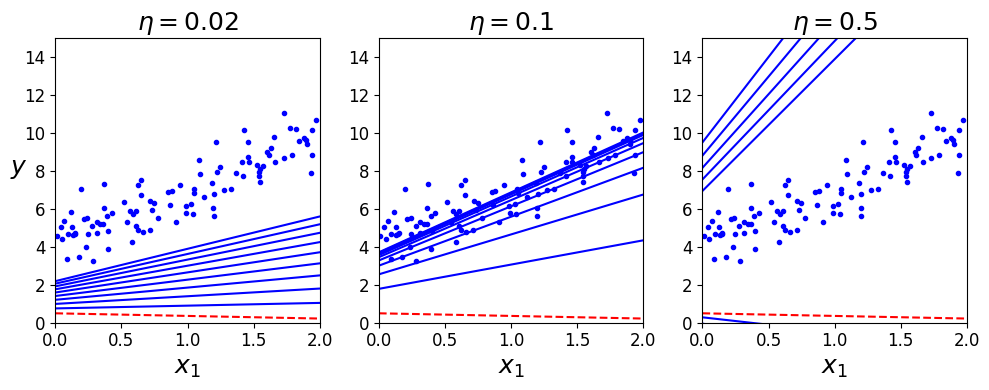

In [24]:
np.random.seed(42)
theta = np.random.randn(2,1)

plt.figure(figsize = (10,4))
plt.subplot(131); plot_gradient_descent(theta, eta = 0.02)
plt.ylabel("$y$", rotation = 0, fontsize = 18)
plt.subplot(132); plot_gradient_descent(theta, eta = 0.1, theta_path = theta_path_bgd)
plt.subplot(133); plot_gradient_descent(theta, eta = 0.5)

save_fig("gradient_descent_plot")
plt.show()

## 2.2. Stochastic Gradient Descent

Saving figure stochastic_gradient_descent_plot


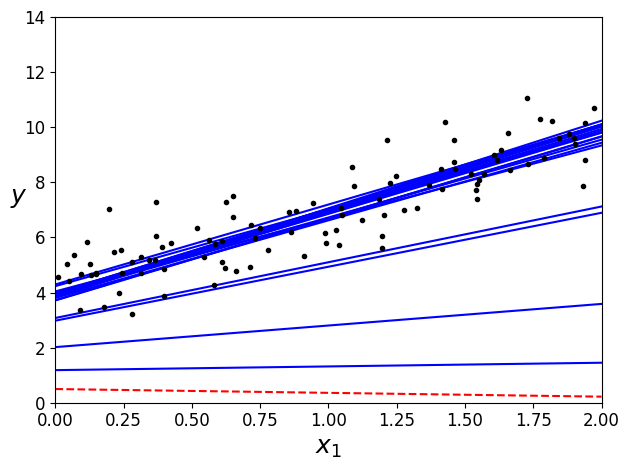

In [14]:
theta_path_sgd = []
m = len(X_b)

np.random.seed(42)

n_epochs = 50
t0, t1 = 5, 50 # learning schedule hyperparameter

def learning_schedule(t):
    return t0/(t+t1)

theta = np.random.randn(2,1)

for epoch in range(n_epochs):
    for i in range(m):
        if epoch == 0 and i<20:
            y_predict = X_new_b.dot(theta)
            style = "b-" if i>0 else "r--"
            plt.plot(X_new, y_predict, style)
        random_index = np.random.randint(m)
        xi = X_b[random_index: random_index+1]
        yi = y[random_index: random_index+1]
        gradient = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch*m + i)
        theta = theta - eta*gradient
        theta_path_sgd.append(theta)
        
plt.plot(X, y, "k.")
plt.xlabel("$x_1$", fontsize = 18)
plt.ylabel("$y$", rotation = 0, fontsize = 18)
plt.axis([0,2,0,14])
save_fig("stochastic_gradient_descent_plot")
plt.show()

In [15]:
theta

array([[4.21076011],
       [2.74856079]])

To perform Linear Regression using Stochastic GD with `scikit-learn`, we can use the `SGDRegressor` class.

In [16]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter = 1000, tol = 1e-3, penalty = None, eta0 = 0.1, random_state = 42)
sgd_reg.fit(X, y.ravel())

SGDRegressor(eta0=0.1, penalty=None, random_state=42)

In [17]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.24365286]), array([2.8250878]))

## 2.3. Mini-batch Gradient Descent

In [18]:
theta_path_mbgd = []
m = len(X_b)

np.random.seed(42)

n_iterations = 50
mini_batch_size = 20

t0, t1 = 200, 1000 # learning schedule hyperparameter
def learning_schedule(t):
    return t0/(t+t1)

theta = np.random.randn(2,1)

t = 0
for epoch in range(n_iterations):
    shuffled_indices = np.random.permutation(m)
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    for i in range(0, m, mini_batch_size):
        t+=1
        xi = X_b_shuffled[i: i+mini_batch_size]
        yi = y_shuffled[i: i+mini_batch_size]
        gradient = 2/mini_batch_size * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(t)
        theta = theta - eta*gradient
        theta_path_mbgd.append(theta)
        
theta

array([[4.25214635],
       [2.7896408 ]])

In [25]:
theta_path_bgd = np.array(theta_path_bgd)
theta_path_sgd = np.array(theta_path_sgd)
theta_path_mbgd = np.array(theta_path_mbgd)

Saving figure gradient_descent_paths_plot


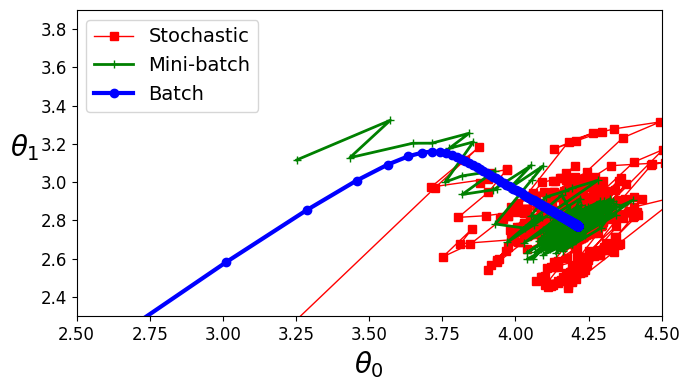

In [37]:
plt.figure(figsize=(7,4))
plt.plot(theta_path_sgd[:, 0], theta_path_sgd[:, 1], "r-s", linewidth=1, label="Stochastic")
plt.plot(theta_path_mbgd[:, 0], theta_path_mbgd[:, 1], "g-+", linewidth=2, label="Mini-batch")
plt.plot(theta_path_bgd[:, 0], theta_path_bgd[:, 1], "b-o", linewidth=3, label="Batch")
plt.legend(loc="upper left", fontsize=14)
plt.xlabel(r"$\theta_0$", fontsize=20)
plt.ylabel(r"$\theta_1$   ", fontsize=20, rotation=0)
plt.axis([2.5, 4.5, 2.3, 3.9])
save_fig("gradient_descent_paths_plot")
plt.show()

# 3. Polynomial Regression

In [32]:
np.random.seed(42)

m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m,1)

Saving figure generated_nonlinear_and_noisy_dataset


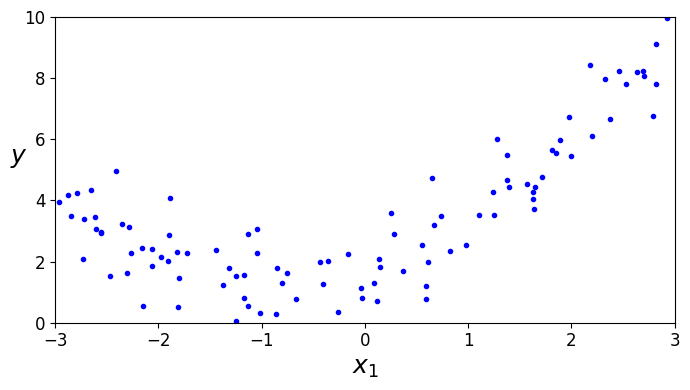

In [33]:
plt.figure(figsize=(7,4))
plt.plot(X, y, 'b.')
plt.xlabel("$x_1$", fontsize = 18)
plt.ylabel("$y$", rotation = 0, fontsize = 18)
plt.axis([-3,3,0,10])
save_fig("generated_nonlinear_and_noisy_dataset")
plt.show()

In [36]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree = 2, include_bias = False)
X_poly = poly_features.fit_transform(X)
X[0], X_poly[0]

(array([-0.75275929]), array([-0.75275929,  0.56664654]))

In [35]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly,y)
lin_reg.intercept_, lin_reg.coef_

(array([1.78134581]), array([[0.93366893, 0.56456263]]))

Saving figure quadratic_predictions_plot


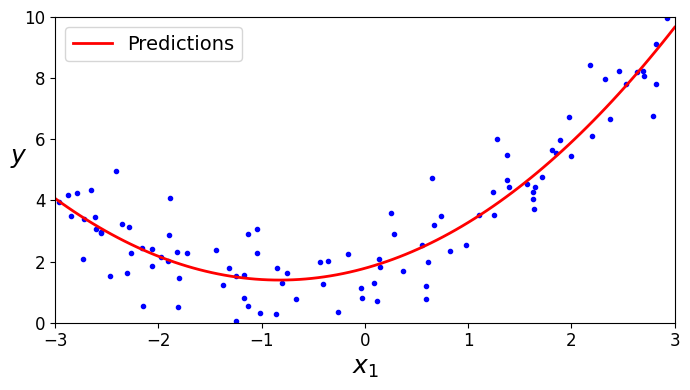

In [39]:
X_new=np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)

plt.figure(figsize=(7,4))
plt.plot(X, y, 'b.')
plt.plot(X_new, y_new, 'r-', lw = 2, label = "Predictions")
plt.legend(loc="upper left", fontsize = 14)
plt.xlabel("$x_1$", fontsize = 18)
plt.ylabel("$y$", rotation = 0, fontsize = 18)
plt.axis([-3,3,0,10])
save_fig("quadratic_predictions_plot")
plt.show()